In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('whitegrid')

In [28]:
train=data = pd.read_csv("input/spam.csv", encoding = "ISO-8859-1", engine = "python")

In [29]:
train.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [30]:
train=train.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)

In [31]:
train.columns=['Label','message']

In [32]:
train.head()

,Label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [33]:
train.describe()

,Label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [34]:
len(train)

5572

In [35]:
train['message']

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: message, Length: 5572, dtype: object

In [36]:
train.groupby('Label').describe()

message                                                               
        count unique                                                top freq
Label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [37]:
train['length']=train['message'].apply(len)

In [38]:
train.head()

,Label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [39]:
train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
length,5572.0,80.118808,59.690841,2.0,36.0,61.0,121.0,910.0


<Axes: xlabel='length', ylabel='Count'>

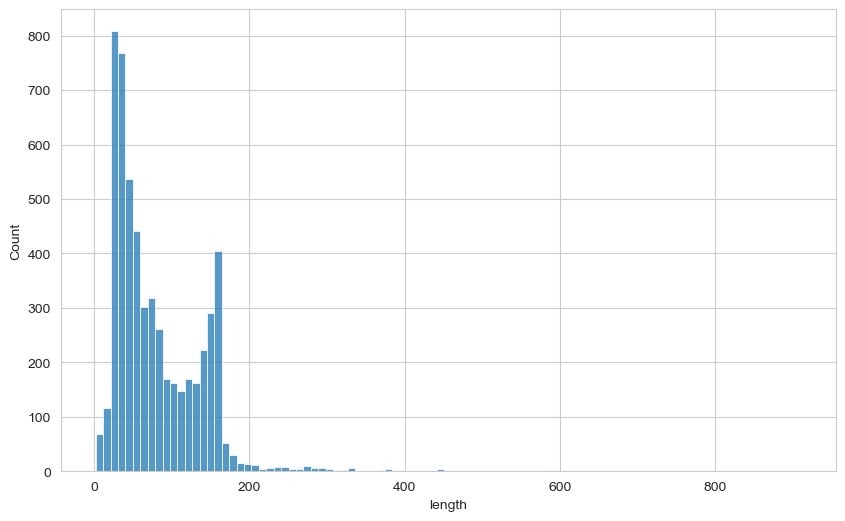

In [40]:
plt.figure(figsize=(10,6))
sns.histplot(x=train['length'])

array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

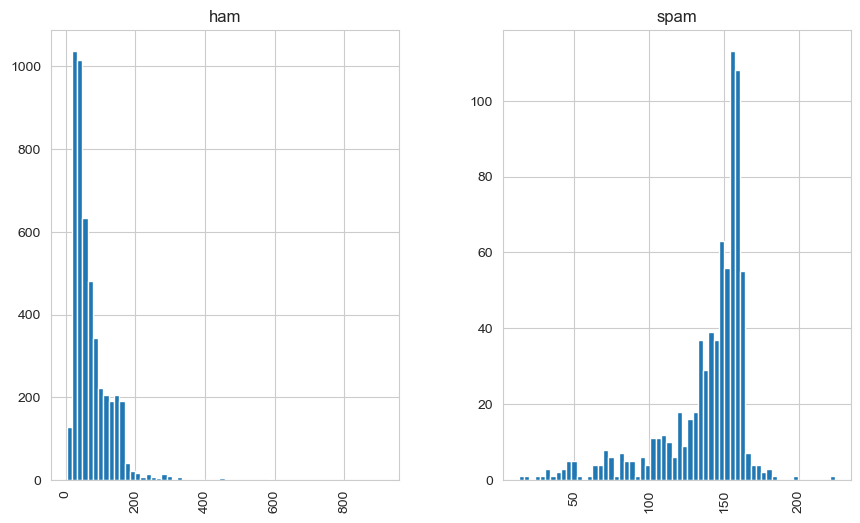

In [41]:
train.hist(column='length',by='Label',bins=60,figsize=(10,6))

In [42]:
import string

In [43]:
string.punctuation  #These are all the punctuation in the string library

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [44]:
mess='Hello, How are you? I am doing Fine.'

In [45]:
nopunc=[char for char in mess if char not in string.punctuation]

In [46]:
nopunc

['H',
 'e',
 'l',
 'l',
 'o',
 ' ',
 'H',
 'o',
 'w',
 ' ',
 'a',
 'r',
 'e',
 ' ',
 'y',
 'o',
 'u',
 ' ',
 'I',
 ' ',
 'a',
 'm',
 ' ',
 'd',
 'o',
 'i',
 'n',
 'g',
 ' ',
 'F',
 'i',
 'n',
 'e']

In [47]:
nopunc=''.join(nopunc) 

In [48]:
nopunc

'Hello How are you I am doing Fine'

In [49]:
from nltk.corpus import stopwords

In [50]:
nopunc=[char for char in nopunc.split() if char.lower() not in stopwords.words('english')]

In [51]:
nopunc  

['Hello', 'Fine']

In [52]:
def simplifier(mess):
    '1.remove punctuation'
    nopunc=[char for char in mess if char not in string.punctuation]
    nopunc=''.join(nopunc)
    '2.remove stopwords and return a clean list'
    return [char for char in nopunc.split() if char.lower() not in stopwords.words('english')]

In [53]:
simplifier('you guys with me this far!')

['guys', 'far']

In [54]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

In [55]:
X=train['message']
y=train['Label']

In [56]:
def classify(model):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)
    pipeline=Pipeline([('bow',CountVectorizer(analyzer=simplifier)),
                       ('tfidf',TfidfTransformer()),
                       ('classifier',model)])
    pipeline.fit(X_train,y_train)
    predictions=pipeline.predict(X_test)
    
    print('accuracy:',pipeline.score(X_test,y_test))
    score=cross_val_score(pipeline,X,y)
    print(score)
    print('CVscore:',np.mean(score))
    print('\n')
    print(classification_report(y_test,predictions))

In [57]:
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB()
classify(model)

accuracy: 0.9611244019138756
[0.96591928 0.95784753 0.96050269 0.95421903 0.96319569]
CVscore: 0.9603368461730442


              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1453
        spam       1.00      0.70      0.83       219

    accuracy                           0.96      1672
   macro avg       0.98      0.85      0.90      1672
weighted avg       0.96      0.96      0.96      1672



In [58]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
classify(model)

accuracy: 0.94377990430622
[0.95605381 0.94798206 0.9551167  0.9443447  0.95601436]
CVscore: 0.9519023274911239


              precision    recall  f1-score   support

         ham       0.94      1.00      0.97      1453
        spam       0.98      0.58      0.73       219

    accuracy                           0.94      1672
   macro avg       0.96      0.79      0.85      1672
weighted avg       0.95      0.94      0.94      1672



In [59]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
classify(model)

accuracy: 0.9611244019138756
[0.96053812 0.96233184 0.96050269 0.95780969 0.96050269]
CVscore: 0.9603370071893794


              precision    recall  f1-score   support

         ham       0.97      0.99      0.98      1453
        spam       0.91      0.79      0.84       219

    accuracy                           0.96      1672
   macro avg       0.94      0.89      0.91      1672
weighted avg       0.96      0.96      0.96      1672



In [60]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
classify(model)

accuracy: 0.972488038277512
[0.96860987 0.97130045 0.96858169 0.96229803 0.97037702]
CVscore: 0.9682334092793715


              precision    recall  f1-score   support

         ham       0.97      1.00      0.98      1453
        spam       1.00      0.79      0.88       219

    accuracy                           0.97      1672
   macro avg       0.98      0.89      0.93      1672
weighted avg       0.97      0.97      0.97      1672



In [61]:
from sklearn.ensemble import AdaBoostClassifier
model=AdaBoostClassifier()
classify(model)

accuracy: 0.9551435406698564
[0.96502242 0.95784753 0.96319569 0.95332136 0.95332136]
CVscore: 0.9585416750529341


              precision    recall  f1-score   support

         ham       0.96      0.99      0.97      1453
        spam       0.94      0.70      0.80       219

    accuracy                           0.96      1672
   macro avg       0.95      0.85      0.89      1672
weighted avg       0.95      0.96      0.95      1672



In [62]:
from sklearn.ensemble import GradientBoostingClassifier
model=GradientBoostingClassifier()
classify(model)

accuracy: 0.9557416267942583
[0.95874439 0.95336323 0.95691203 0.94344704 0.95421903]
CVscore: 0.9533371440532642


              precision    recall  f1-score   support

         ham       0.95      1.00      0.98      1453
        spam       0.99      0.67      0.80       219

    accuracy                           0.96      1672
   macro avg       0.97      0.83      0.89      1672
weighted avg       0.96      0.96      0.95      1672



In [63]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()
classify(model)

accuracy: 0.90311004784689
[0.90044843 0.89775785 0.8994614  0.89587074 0.90125673]
CVscore: 0.898959029393532


              precision    recall  f1-score   support

         ham       0.90      1.00      0.95      1453
        spam       1.00      0.26      0.41       219

    accuracy                           0.90      1672
   macro avg       0.95      0.63      0.68      1672
weighted avg       0.91      0.90      0.88      1672



In [64]:
from sklearn.svm import SVC
model=SVC()
classify(model)

accuracy: 0.9712918660287081
[0.97757848 0.97130045 0.96768402 0.96858169 0.97486535]
CVscore: 0.9720019966025554


              precision    recall  f1-score   support

         ham       0.97      1.00      0.98      1453
        spam       0.99      0.79      0.88       219

    accuracy                           0.97      1672
   macro avg       0.98      0.89      0.93      1672
weighted avg       0.97      0.97      0.97      1672



In [65]:
from sklearn.model_selection import GridSearchCV
param_grid={'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.0001]}
model=GridSearchCV(SVC(),param_grid)
classify(model)

accuracy: 0.9826555023923444
[0.98295964 0.97757848 0.98294434 0.98025135 0.97935368]
CVscore: 0.9806174976451361


              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1453
        spam       0.99      0.88      0.93       219

    accuracy                           0.98      1672
   macro avg       0.99      0.94      0.96      1672
weighted avg       0.98      0.98      0.98      1672

